In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import streamlit as st



ModuleNotFoundError: No module named 'yfinance'

In [ ]:
ticker = 'KO'
data = yf.download(ticker, start='2015-01-01', end='2023-12-31')
data.reset_index(inplace=True)

NameError: name 'yf' is not defined

In [ ]:
print("Missing values before handling:")
print(data.isnull().sum())
data.fillna(method='ffill', inplace=True)
data.fillna(0, inplace=True)

Missing values before handling:
Price      Ticker
Date                 0
Adj Close  KO        0
Close      KO        0
High       KO        0
Low        KO        0
Open       KO        0
Volume     KO        0
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15072\350664790.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['Daily_Return'] = data['Close'].pct_change()
data['Volatility'] = data['Daily_Return'].rolling(window=20).std()
data.dropna(inplace=True)

In [ ]:
def plot_stock_prices():
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.plot(data['Date'], data['MA_20'], label='MA 20', linestyle='--')
    plt.plot(data['Date'], data['MA_50'], label='MA 50', linestyle='--')
    plt.title('Coca-Cola Stock Prices with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    


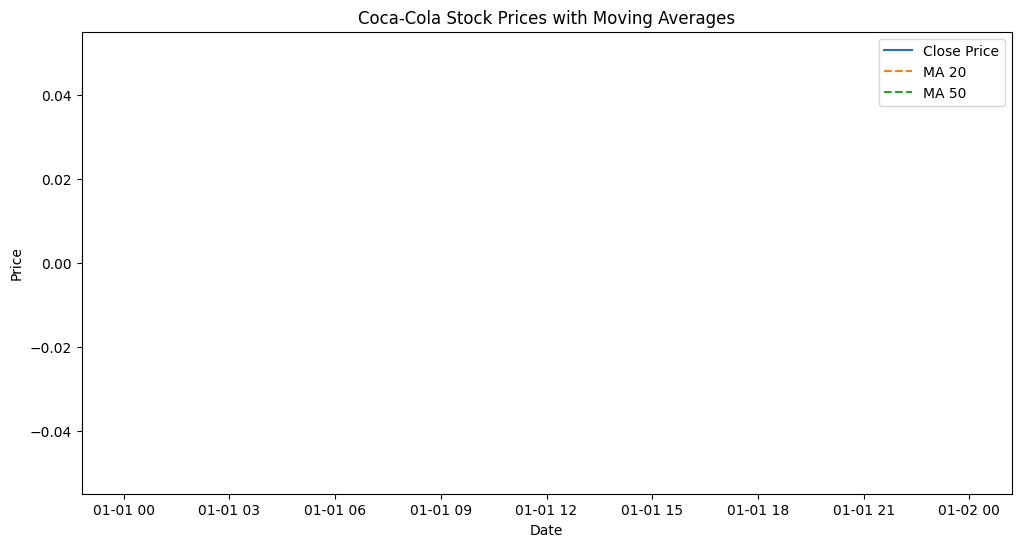

NameError: name 'df' is not defined

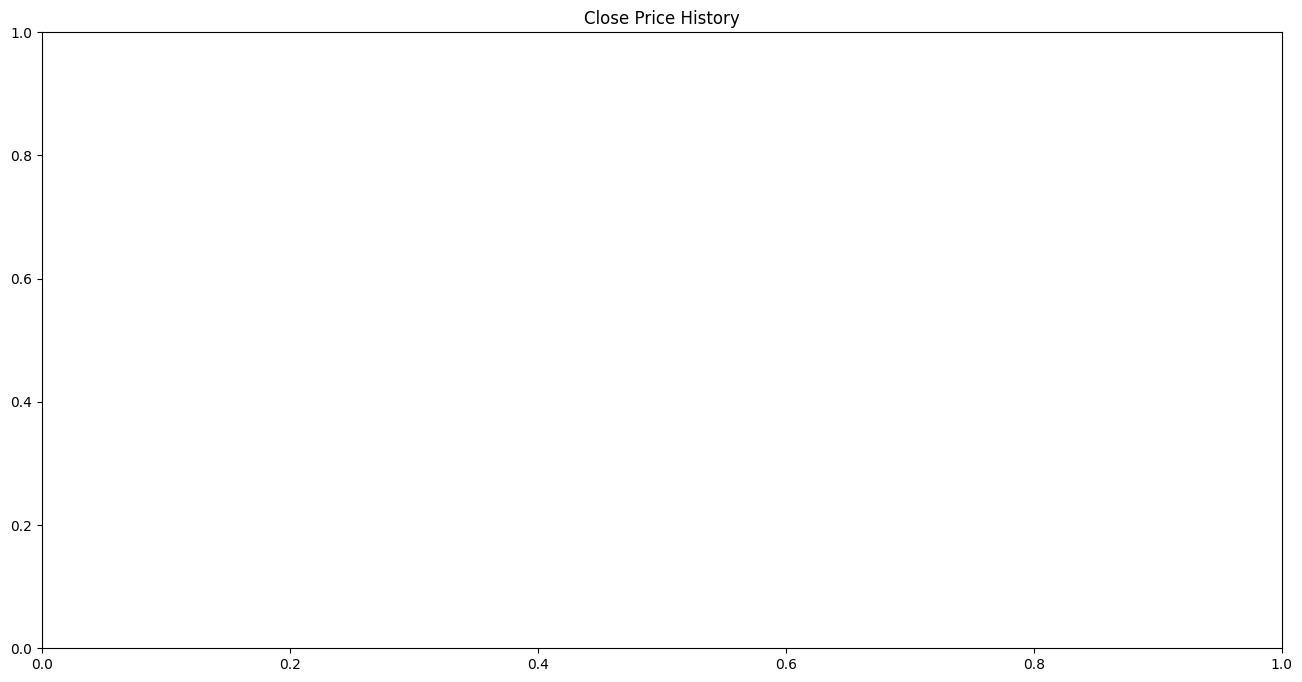

In [ ]:
plot_stock_prices()

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

NameError: name 'X_train' is not defined

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


NameError: name 'y_test' is not defined

In [ ]:
live_data = yf.download(ticker, period='1d', interval='1m')
live_data['MA_20'] = live_data['Close'].rolling(window=20).mean()
live_data['MA_50'] = live_data['Close'].rolling(window=50).mean()
live_data['Daily_Return'] = live_data['Close'].pct_change()
live_data['Volatility'] = live_data['Daily_Return'].rolling(window=20).std()
live_data.fillna(0, inplace=True)
latest_features = live_data[features].iloc[-1:].dropna()
live_prediction = model.predict(latest_features)
print(f"Predicted Closing Price: {live_prediction[0]}")

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['KO']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


NameError: name 'features' is not defined

In [ ]:
st.title("Coca-Cola Stock Price Prediction")
st.subheader("Stock Price Chart")
st.line_chart(data.set_index('Date')[['Close', 'MA_20', 'MA_50']])

st.subheader("Prediction Result")
st.write(f"Predicted Closing Price: ${live_prediction[0]:.2f}")

st.subheader("Live Data Preview")
st.dataframe(live_data.tail())


Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
